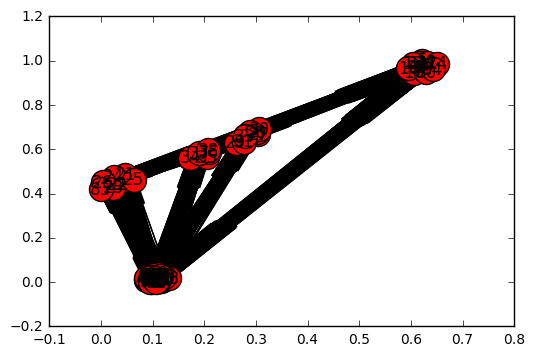

In [1]:
import pandas as pd
import networkx as nx
import pylab

# Load trip data file and convert it to a dictionary of lists
df = pd.read_csv('trip.csv')
headers = list(df)
rows = df.values.tolist()
columns = list(map(list, zip(*rows)))
data = dict()
for i, header in enumerate(headers):
	data[header] = columns[i]

# Get unique station ids
unique_stations = []
for station_id in data['start_station_id']:
	if station_id not in unique_stations:
		unique_stations.append(station_id)
for station_id in data['end_station_id']:
	if station_id not in unique_stations:
		unique_stations.append(station_id)

# Count trips between stations
counts = dict()
for start_id in unique_stations:
	for end_id in unique_stations:
		counts[(start_id, end_id)] = 0
for i in range(len(data['start_station_id'])):
	start_id = data['start_station_id'][i]
	end_id = data['end_station_id'][i]
	counts[(start_id, end_id)] += 1

# Create network
G = nx.DiGraph()
for start_id in unique_stations:
	for end_id in unique_stations:
		G.add_edge(start_id, end_id, weight = counts[(start_id, end_id)])

# Visualize
nx.draw_networkx(G)
pylab.show()

In [2]:
df

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [3]:
df = df.drop(df[df.duration < 180].index)

In [4]:
df

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
35,5088,183,8/29/2013 22:08,Market at 4th,76,8/29/2013 22:12,Post at Kearney,47,309,Subscriber,94115
36,4721,184,8/29/2013 16:27,Market at 10th,67,8/29/2013 16:30,South Van Ness at Market,66,416,Subscriber,94107
37,4636,186,8/29/2013 15:11,2nd at Folsom,62,8/29/2013 15:14,2nd at Townsend,61,366,Subscriber,94109
38,4812,186,8/29/2013 17:30,2nd at Folsom,62,8/29/2013 17:33,2nd at Folsom,62,409,Subscriber,94107
39,4720,188,8/29/2013 16:27,Market at 10th,67,8/29/2013 16:30,South Van Ness at Market,66,379,Subscriber,94109
40,4798,188,8/29/2013 17:22,Powell Street BART,39,8/29/2013 17:25,Market at 4th,76,429,Subscriber,94102
41,4944,188,8/29/2013 19:06,Clay at Battery,41,8/29/2013 19:10,Washington at Kearney,46,502,Customer,94612
42,4400,189,8/29/2013 12:39,Washington at Kearney,46,8/29/2013 12:42,Clay at Battery,41,619,Subscriber,94609
43,4606,191,8/29/2013 14:38,San Jose City Hall,10,8/29/2013 14:42,San Jose City Hall,10,35,Subscriber,95138
44,4705,193,8/29/2013 16:15,Golden Gate at Polk,59,8/29/2013 16:18,San Francisco City Hall,58,519,Subscriber,94107


In [26]:
dfsubscriber=df[df.subscription_type=="Subscriber"].sort_values("end_station_id")

In [27]:
dfsubscriber

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
438257,753053,913,5/5/2015 7:36,Japantown,9,5/5/2015 7:51,San Jose Diridon Caltrain Station,2,90,Subscriber,95112
513063,650450,339,2/19/2015 16:50,San Pedro Square,6,2/19/2015 16:55,San Jose Diridon Caltrain Station,2,666,Subscriber,94002
108622,150948,465,1/13/2014 7:48,Paseo de San Antonio,7,1/13/2014 7:56,San Jose Diridon Caltrain Station,2,159,Subscriber,95112
281653,245412,352,4/11/2014 17:25,San Pedro Square,6,4/11/2014 17:31,San Jose Diridon Caltrain Station,2,669,Subscriber,94002
370674,841679,336,7/10/2015 16:54,San Pedro Square,6,7/10/2015 17:00,San Jose Diridon Caltrain Station,2,700,Subscriber,94002
281640,245433,381,4/11/2014 17:35,St James Park,13,4/11/2014 17:41,San Jose Diridon Caltrain Station,2,104,Subscriber,94108
622527,500086,197,10/15/2014 15:58,Adobe on Almaden,5,10/15/2014 16:01,San Jose Diridon Caltrain Station,2,145,Subscriber,94002
513090,650410,368,2/19/2015 16:33,San Pedro Square,6,2/19/2015 16:40,San Jose Diridon Caltrain Station,2,19,Subscriber,94107
617486,506832,752,10/20/2014 17:00,San Jose City Hall,10,10/20/2014 17:12,San Jose Diridon Caltrain Station,2,99,Subscriber,94111
251337,285665,298,5/15/2014 16:05,Adobe on Almaden,5,5/15/2014 16:10,San Jose Diridon Caltrain Station,2,86,Subscriber,94105


In [33]:
subscriber_count=dfsubscriber["end_station_id"].value_counts(sort=False)
subscriber_count

2      8724
3       871
4      3204
5       930
6      2435
7      2002
8      1260
9      1681
10     1257
11     1942
12     1030
13     1211
14      789
16     1075
21      166
22      989
23      198
24      179
25      387
26      400
27     2858
28     5518
29     1592
30     1108
31     1605
32     1529
33      749
34     1153
35      478
36      605
      ...  
50    23872
51    11161
54    10313
55    20602
56    10256
57    12509
58     2338
59     4754
60    17521
61    24457
62     8410
63    11840
64    14140
65    24605
66     8703
67    14606
68     9819
69    32688
70    58719
71     4745
72    11380
73     5752
74    20411
75     9763
76    15107
77    24237
80      715
82     8119
83      229
84     1234
Name: end_station_id, dtype: int64

In [39]:
dfcustomer=df[df.subscription_type=="Customer"].sort_values("end_station_id")

In [40]:
dfcustomer

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
528337,630253,260,2/3/2015 18:07,Santa Clara at Almaden,4,2/3/2015 18:11,San Jose Diridon Caltrain Station,2,107,Customer,94110
660772,445560,40183,9/10/2014 4:54,Ryland Park,84,9/10/2014 16:04,San Jose Diridon Caltrain Station,2,162,Customer,95112
498098,671845,1752,3/6/2015 20:49,San Jose Diridon Caltrain Station,2,3/6/2015 21:18,San Jose Diridon Caltrain Station,2,153,Customer,95112
498034,671948,748,3/7/2015 8:23,San Salvador at 1st,8,3/7/2015 8:36,San Jose Diridon Caltrain Station,2,217,Customer,95113
32489,47506,1474,10/6/2013 9:14,San Jose Civic Center,3,10/6/2013 9:38,San Jose Diridon Caltrain Station,2,656,Customer,95066
32488,47505,1614,10/6/2013 9:11,San Jose Civic Center,3,10/6/2013 9:38,San Jose Diridon Caltrain Station,2,174,Customer,95336
295172,227177,959,3/26/2014 5:57,Japantown,9,3/26/2014 6:13,San Jose Diridon Caltrain Station,2,127,Customer,95112
258106,276679,580,5/8/2014 9:42,San Jose Civic Center,3,5/8/2014 9:52,San Jose Diridon Caltrain Station,2,156,Customer,5468
55917,78679,263,10/31/2013 14:52,Adobe on Almaden,5,10/31/2013 14:57,San Jose Diridon Caltrain Station,2,80,Customer,94087
107906,149927,652,1/10/2014 22:15,San Jose Civic Center,3,1/10/2014 22:26,San Jose Diridon Caltrain Station,2,83,Customer,95126


In [43]:
customer_count=dfcustomer["end_station_id"].value_counts(sort=False)
customer_count

64     1371
65     1753
2       601
66     2278
3       863
67     2673
4       296
68     1961
5       209
69     1686
6       668
70     3895
7       388
71     3805
8       338
72     2096
9       508
73     3374
10      316
74     3855
11      417
75     1672
12      288
76     4461
13      216
77     2463
14      320
16      379
80      140
82      788
      ...  
29      303
30      255
31      220
32      244
33      339
34      600
35     1242
36      477
37      352
38      285
39     4061
41     1463
42     1013
45      982
46     1751
47     1459
48     3863
49      982
50     8510
51     1325
54     2057
55      791
56     1209
57     1804
58      928
59     1084
60    13122
61     3423
62      918
63     1044
Name: end_station_id, dtype: int64

In [58]:
dfsubscriber.groupby('end_station_id').size()
subscriber_count=dfsubscriber.groupby('end_station_id').size()

In [59]:
dfcustomer.groupby('end_station_id').size()
customer_count=dfcustomer.groupby('end_station_id').size()

In [60]:
subscriber_count

end_station_id
2      8724
3       871
4      3204
5       930
6      2435
7      2002
8      1260
9      1681
10     1257
11     1942
12     1030
13     1211
14      789
16     1075
21      166
22      989
23      198
24      179
25      387
26      400
27     2858
28     5518
29     1592
30     1108
31     1605
32     1529
33      749
34     1153
35      478
36      605
      ...  
50    23872
51    11161
54    10313
55    20602
56    10256
57    12509
58     2338
59     4754
60    17521
61    24457
62     8410
63    11840
64    14140
65    24605
66     8703
67    14606
68     9819
69    32688
70    58719
71     4745
72    11380
73     5752
74    20411
75     9763
76    15107
77    24237
80      715
82     8119
83      229
84     1234
dtype: int64

In [61]:
import matplotlib.pyplot as plt

In [63]:
plt.plot(subscriber_count)

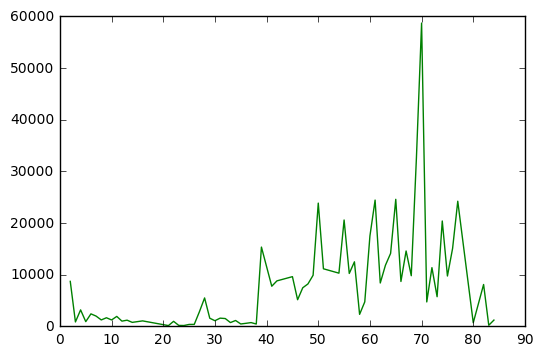

In [66]:
plt.show()

In [67]:
plt.plot(customer_count)

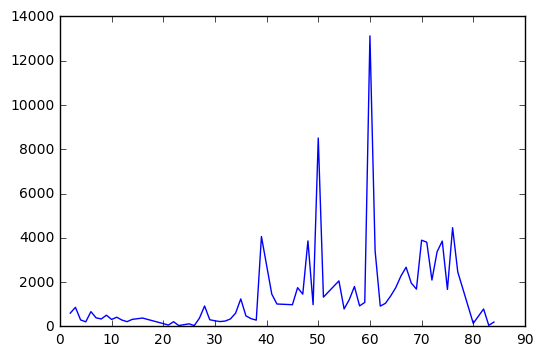

In [68]:
plt.show()

In [77]:
plt.bar(customer_count.index, customer_count.values)

<Container object of 70 artists>

In [79]:
plt.show()

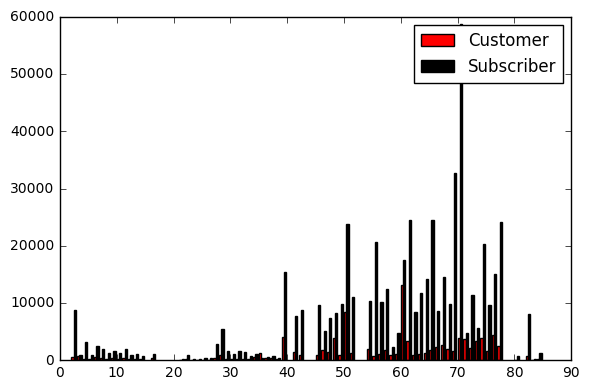

In [96]:
fig, ax = plt.subplots()
rects1=plt.bar(customer_count.index, customer_count.values, 0.4, color="r", label="Customer")
rects1=plt.bar(subscriber_count.index+0.4, subscriber_count.values, 0.4, color="k", label="Subscriber")
plt.tight_layout()
plt.legend()
plt.show()

0.532671884892


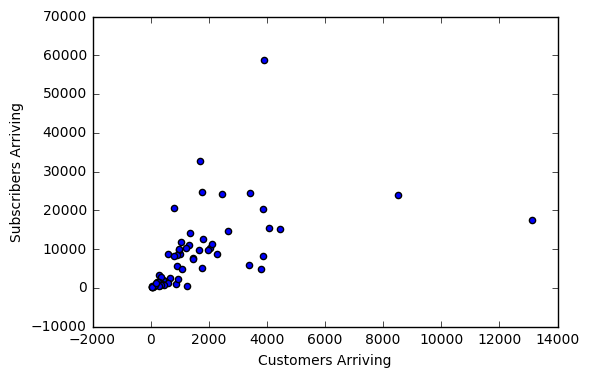

In [107]:
from scipy import stats
import numpy as np

slope, intercept, r, p, stderr = stats.linregress(customer_count.values, subscriber_count.values)


plt.scatter(customer_count.values, subscriber_count.values)
plt.xlabel('Customers Arriving')
plt.ylabel('Subscribers Arriving')
plt.show()